Name : Ahmadreza Eslaminia


\
NetID: ae15





# Nuclear Geometry and Characterization of the Quark Gluon Plasma

<img src="https://raw.githubusercontent.com/illinois-ipaml/MachineLearningForPhysics/main/img/Project_NuclearGeometryQCD-Figure.jpg" width=400 align=left></img><br>

## <span style="color:Orange">Overview</span>

Collisions between two nuclei at ultra-relativistic energies are used to create the Quark-Gluon Plamsa (QGP)--a novel state of matter.  In this project, you will learn a bit about what the QGP is and how to think about the geometry of collisions between two nuclei. Here Gen AI has been used for writing, and code debugging.




## <span style="color:Orange">Data Sources</span>

File URLs

$b=0$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b0_10kevents.csv

$b=6$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b6_10kevents.csv

## <span style="color:Orange">Questions</span>

### <span style="color:LightGreen">Question 01</span>

What is the quark-gluon plasma?  Why does it need to be created in collisions of two nuclei?  Make sure to cite any resources you use.


**Answer**:
Quark-gluon plasma, or QGP, is what we call a super-hot soup of particles, kind of like the very early baby picture of the universe just a fraction of a second after the Big Bang. It's a special state where tiny particles that usually make up the cores of atoms—quarks, and the glue-like particles holding them together—gluons, are free from their usual bonds. Instead of being stuck inside protons and neutrons, they zip around all on their own. This freedom is something that doesn't happen under normal conditions; it's unique to the insanely hot and dense environment that can only be recreated when we smash together heavy atomic nuclei really, really hard in big machines like the LHC (Large Hadron Collider) or the RHIC (Relativistic Heavy Ion Collider) [<span style="color:Red">4</span>][<span style="color:Red">5</span>].

When scientists make this quark-gluon plasma in the lab, they're basically turning back the cosmic clock to a time when the universe was less than a millionth of a second old—that's way younger than any dinosaur fossil. Studying this plasma is super important because it helps us figure out some really tough puzzles about how the universe works at a basic level, like quantum chromodynamics—the theory that explains how quarks and gluons interact. By looking at QGP, we can also get clues about how the universe went from being this hot, dense state to having all the stars and galaxies we see now. It's like piecing together a family tree, but for the whole universe! [<span style="color:Red">6</span>].


### <span style="color:LightGreen">Question 02</span>

The nuclei involved in these collisions are fully stripped of electrons.  The nucleus itself is composed of a number of protons and neutrons (collectively nucleons).  On average, those nucleons are distributed according to a Woods-Saxon distribution with respect to the center of the nucleus, $r$:

$$
\Large \rho(r) = \frac{\rho_0}{1 + exp{((r-c)/z)}}
$$

For lead (208 nucleons), $c = 6.61 fm$ and $z=0.545 fm$ (a $fm$ is $10^{-15}m$).  Plot the density of nucleons as a function of $r$ for lead.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os.path
from scipy.stats import skew
import subprocess
import scipy

In [2]:
def rho(r):
  c=6.61
  z=0.545
  return 1/(1+np.exp((r-c)/z))

In [3]:
r=np.linspace(0,10,100)
R=rho(r)
np.random.seed(42)

Text(0, 0.5, 'P')

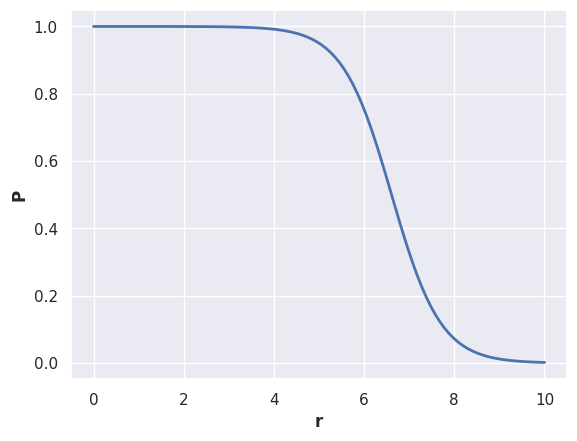

In [4]:
plt.plot(r,R,linewidth=2)
plt.xlabel('r',weight='bold')
plt.ylabel("P",weight='bold')

This Figure illustrates the probability density of the nucleons in nuclei. You can see, the probability is almost one near the center of the atom, and it reduces far from the center.

### <span style="color:LightGreen">Question 03</span>

Two lead nuclei collide with one moving along the positive $z$ direction and one moving along the negative $z$ direction.  When they collide, there is a distance $b$ between the two centers in the $xy$-plane.  Assume the nuclei are each spheres with a radius of 6.61fm.  Plot the shape of the overlap of the two spheres in the $xy$ plane for $b = 0 fm$ and $b = 6 fm$.  Put the center of the overlap region at $x = y = 0$.

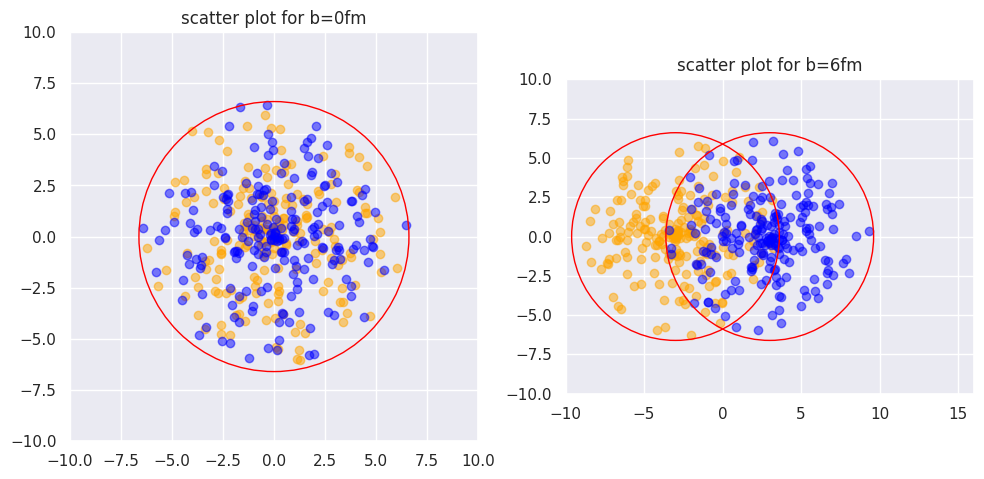

In [8]:
def generate_points_wood(center, radius, total_points, rho):
    points = 0
    ac_x = []
    ac_y = []
    while points < total_points:
        # Generate a random point inside the sphere
        r = radius * np.random.uniform(0, 1)**(1/3)
        theta = np.random.uniform(0, np.pi)
        phi = np.random.uniform(0, 2 * np.pi)

        x = r * np.sin(theta) * np.cos(phi)
        y = r * np.sin(theta) * np.sin(phi)


        if np.random.random() < rho(r):
            ac_x.append(center[0] + x)
            ac_y.append(center[1] + y)
            points += 1

    return np.array(ac_x), np.array(ac_y)

radius = 6.61

center1_b0 = (0, 0)
center2_b0 = (0, 0)
center1_b6 = (-3, 0)
center2_b6 = (3, 0)
points = 208
# Generate points
x1_b0, y1_b0 = generate_points_wood(center1_b0, radius, points, rho)
x2_b0, y2_b0 = generate_points_wood(center2_b0, radius, points, rho)
x1_b6, y1_b6 = generate_points_wood(center1_b6, radius, points, rho)
x2_b6, y2_b6 = generate_points_wood(center2_b6, radius, points, rho)
# Set up the figure and axis for new plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for b=0fm with Woods-Saxon points
axs[0].scatter(x1_b0, y1_b0, color='orange', alpha=0.5)
axs[0].scatter(x2_b0, y2_b0, color='blue', alpha=0.5)
circle1 = plt.Circle(center1_b0, radius, color='red', fill=False)
axs[0].add_artist(circle1)
axs[0].set_xlim(-10, 10)
axs[0].set_ylim(-10, 10)
axs[0].set_aspect('equal')
axs[0].set_title('scatter plot for b=0fm')

# Scatter plot for b=6fm with Woods-Saxon points
axs[1].scatter(x1_b6, y1_b6, color='orange', alpha=0.5)
axs[1].scatter(x2_b6, y2_b6, color='blue', alpha=0.5)
circle1 = plt.Circle(center1_b6, radius, color='red', fill=False)
circle2 = plt.Circle(center2_b6, radius, color='red', fill=False)
axs[1].add_artist(circle1)
axs[1].add_artist(circle2)
axs[1].set_xlim(-10, 16)
axs[1].set_ylim(-10, 10)
axs[1].set_aspect('equal')
axs[1].set_title('scatter plot for b=6fm')

# Show the plot
plt.tight_layout()
plt.show()


left figure shows the overlapping region for two nuclei with zero distance between the centers. The radius of particles is generated based on the probability distribution in the previous question. The particle outside the region is not shown in the pictures, however when generating random particles, some of them are outside of the sphere. The number of particles is almost 208 which is the number of nucleons in lead nuclei. As can be seen, particles are concentrated in the center and have lower density on the sides. Right Figure  shows the overlapping region for two nuclei where the distance between two centers is 6 fm. As can be seen some particles are trapped in the overlapping region.

### <span style="color:LightGreen">Question 04</span>

The eccentricity of a distribution can be calculated as:

$$
\Large \varepsilon_2 = \frac{\sqrt{\langle r^2\cos(2\phi)\rangle^2 + \langle r^2\sin(2\phi)\rangle^2}}{\langle r^2 \rangle}
$$

Here $r$ and $\phi$ are the usual polar coordinate variables (everything is in the $xy-$plane).  Calculate the eccentricity of the overlap shape for these two cases.

Answer: The eccentricity for both cases has been calculated in previous section. Here we only preint them.

In [9]:
def calculate_eccentricity(x, y):

    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)


    r2_cos = np.average(r**2 * np.cos(2 * phi))
    r2_sin = np.average(r**2 * np.sin(2 * phi))
    r2_avg = np.average(r**2)


    eccentricity = np.sqrt(r2_cos**2 + r2_sin**2) / r2_avg
    return eccentricity



# Calculate eccentricity for b=0
x_b0 = np.concatenate((x1_b0, x2_b0))
y_b0 = np.concatenate((y1_b0, y2_b0))
e2_b0 = calculate_eccentricity(x_b0, y_b0)

# Calculate eccentricity for b=6

overlap_mask_b6 = np.sqrt((x2_b6 - center1_b6[0])**2 + (y2_b6 - center1_b6[1])**2) <= radius
x_b6 = np.concatenate((x1_b6, x2_b6[overlap_mask_b6]))
y_b6 = np.concatenate((y1_b6, y2_b6[overlap_mask_b6]))
e2_b6 = calculate_eccentricity(x_b6, y_b6)

print(f"eccentricity for b=0, b=6 are : {e2_b0, e2_b6} respectively")


eccentricity for b=0, b=6 are : (0.020491063533170012, 0.4113505783496337) respectively


As we have the coordinates of the particles, we can easily measure the eccentricity of the particles. For the first case (b=0), eccentricity is 0.0204910635331700122 which is relatively low, as most of the particles are aligned in the center. In the second case (b=6), the eccentricity is 0.4113505783496337, as the particles are shifted respect to the center of the overlapping region.

### <span style="color:LightGreen">Question 05</span>

The eccentricity defines the shape of the QGP and it drives an asymmetric explosion of the QGP.  Take a look at this video (up through the 29 minute mark: https://www.youtube.com/watch?v=NTfaIyInhOY).  Briefly summerize what we can learn about the QGP from the geometry of nuclear collisions.

Answer:
In collisions, where the nuclei mash together, we get a crowded spot where the nucleons are more densely packed. Depending on whether this spot is round or more like an oval, the pressure inside isn't the same everywhere. It's a bit like squeezing a toothpaste tube in the middle—more toothpaste shoots out the sides than the ends. This squeeze in the nuclei creates a sort of side explosion, pushing out quark-gluon plasma (QGP) stronger in one direction. The way the QGP flies out can tell us a lot about the crash—it's kind of like looking at splatter patterns to figure out how something broke. Different shapes in this squished zone lead to varied splatters, giving us clues about the early universe's matter under extreme conditions.


---

The remaining questions refer to the following data sources:

$b=0$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGP/PbPb_b0_10kevents.csv

$b=6$ fm
* https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b6_10kevents.csv

(also linked from above).  

The nucleus is a quantum system and the nucleons are not static inside the nucleus.  Since the nucleus is made up of individual nucleons, it is pairs of nucleons which collide (with one nucleon coming from each nucleus) inside of the smooth distribution from Question 3.

Each file contains simulations of 10k collisions between two lead nuclei and provides the $x$ and $y$ positions of each of the protons and neutrons that hit a nucleon from the other nucleus (units are in $fm$).  The files are created using the Monte Carlo Glauber Model (ref [[1]](https://arxiv.org/pdf/1710.07098.pdf))

### <span style="color:LightGreen">Question 06</span>

 Calculate the $\varepsilon_2$ values for each of these collisions and compare to what you got in Question 4 (make a plot!).  Note here you will get a different value of $\varepsilon_2$ for each collision, so you will have 10k values of $\varepsilon_2$ for each file.  Shift *each collision* to be centered at the origin by shifting each nucleon collision so that  $\langle x \rangle = \langle y \rangle = 0$. Calculate the mean, standard deviation and skewness for both values of $b$.

In [10]:
def wget_data(url: str):
    local_path = './tmp_data'
    p = subprocess.Popen(["wget", "-nc", "-P", local_path, url], stderr=subprocess.PIPE, encoding='UTF-8')
    rc = None
    while rc is None:
      line = p.stderr.readline().strip('\n')
      if len(line) > 0:
        print(line)
      rc = p.poll()

def locate_data(name, check_exists=True):
    local_path='./tmp_data'
    path = os.path.join(local_path, name)
    if check_exists and not os.path.exists(path):
        raise RuxntimeError('No such data file: {}'.format(path))
    return path

In [11]:
wget_data('https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b0_10kevents.csv')
wget_data('https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b6_10kevents.csv')

--2024-04-22 04:16:01--  https://courses.physics.illinois.edu/phys503/fa2023/data/projects/NuclearGeometryQGC/PbPb_b0_10kevents.csv
Resolving courses.physics.illinois.edu (courses.physics.illinois.edu)... 130.126.151.14
Connecting to courses.physics.illinois.edu (courses.physics.illinois.edu)|130.126.151.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98389863 (94M) [application/octet-stream]
Saving to: ‘./tmp_data/PbPb_b0_10kevents.csv’
     0K .......... .......... .......... .......... ..........  0% 1003K 96s
    50K .......... .......... .......... .......... ..........  0% 1.94M 72s
   100K .......... .......... .......... .......... ..........  0%  169M 48s
   150K .......... .......... .......... .......... ..........  0% 1.93M 48s
   200K .......... .......... .......... .......... ..........  0% 35.1M 39s
   250K .......... .......... .......... .......... ..........  0% 2.08M 40s
   300K .......... .......... .......... .......... ..........  0% 

In [12]:
Data = pd.read_csv(locate_data('PbPb_b0_10kevents.csv'))
Data6 = pd.read_csv(locate_data('PbPb_b6_10kevents.csv'))

First we calcualte it for b=0

In [13]:
# E2 for b=0
e2_b0 = np.empty(1000)
for i in range (1000):
  A=np.array(Data.loc[Data['event']==str(10*i)],dtype=float)
  A=A[:,1:3]
  x=A[:,0]-np.mean(A[:,0])
  y=A[:,1]-np.mean(A[:,1])
  r=x**2+y**2
  Phi=np.arctan(y/x)
  e2_b0[i]=(((np.sum(r**2*np.cos(2*Phi))))**2+(np.sum(r**2*np.sin(2*Phi)))**2)**0.5/(np.sum(r**2))


In [14]:
mean_b0, std_b0, skew_b0 = np.mean(e2_b0), np.std(e2_b0), skew(e2_b0)

print(f"mean, stdm skew for b0 are:{mean_b0, std_b0, skew_b0}")

mean, stdm skew for b0 are:(0.08364779989971283, 0.04296827664967981, 0.6179695007871379)


Text(0, 0.5, 'N')

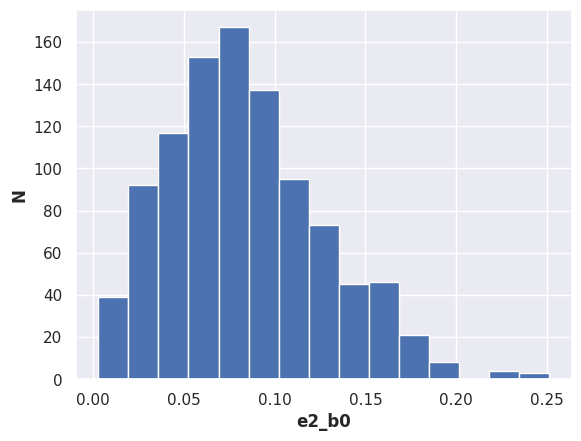

In [15]:
#histogram bor b-0
plt.hist(e2_b0,bins=15)
plt.xlabel('e2_b0',weight='bold')
plt.ylabel("N",weight='bold')


Figure shows the histogram of the eccentricity values for b = 0. The eccentricity value is different for each event, but the peak value (0.07) is larger than what we measured in previous section (0.02).




In [16]:
Data.describe()

,x,y
count,4.073503e+06,4.073503e+06
mean,2.476907e-04,1.046653e-04
std,3.121104e+00,3.120870e+00
min,-1.014100e+01,-1.046900e+01
25%,-2.371140e+00,-2.371560e+00
50%,2.398490e-04,-1.942460e-03
75%,2.372420e+00,2.375050e+00
max,1.076330e+01,1.073740e+01


Here we go for b =6

In [17]:
# E2 for b=6
e2_b6 = np.empty(1000)
for i in range (1000):
  A=np.array(Data6.loc[Data6['event']==str(10*i)],dtype=float)
  A=A[:,1:3]
  x=A[:,0]-np.mean(A[:,0])
  y=A[:,1]-np.mean(A[:,1])
  r=x**2+y**2
  Phi=np.arctan(y/x)
  e2_b6[i]=(((np.sum(r**2*np.cos(2*Phi))))**2+(np.sum(r**2*np.sin(2*Phi)))**2)**0.5/(np.sum(r**2))

In [18]:
mean_b6, std_b6, skew_b6 = np.mean(e2_b6), np.std(e2_b6), skew(e2_b6)

print(f"mean, stdm skew for b=6 are:{mean_b6, std_b6, skew_b6}")

mean, stdm skew for b=6 are:(0.2873678223075192, 0.12007488690063838, 0.13558875164936798)


Text(0, 0.5, 'N')

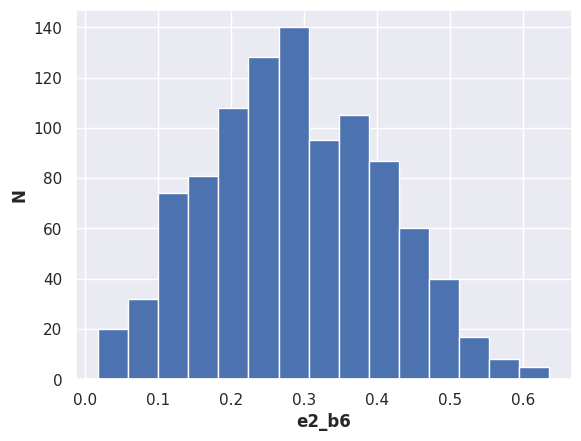

In [19]:
#histogram bor b-6
plt.hist(e2_b6,bins=15)
plt.xlabel('e2_b6',weight='bold')
plt.ylabel("N",weight='bold')


Figure shows the histogram of the eccentricity values for b = 6. The eccentricity value is different for each event, but the peak value (0.3) is lower than what we measured in previous section (0.411).


it is worth mentioning in both cases the eccentricity for the b0 is lower than for the b6 which makes sense. Also the order of the both b0 and b6 are the same in both ways of computing it.  

### <span style="color:LightGreen">Question 07</span>

Use Kernel Density Esimation to try to take into account that the nucleons have a finite size. Here's a nice discussion of the proton radius https://en.wikipedia.org/wiki/Proton_radius_puzzle; assume the neutron is the same size here (a pretty good assumption).  Explain how you chose the kernel to use and how sensitive you are to the bandwidth.  How does the eccentricity compare to what you found in Question 6 (write a paragraph and make plots to support your conclusions).

Here we see representation for all events for b=0

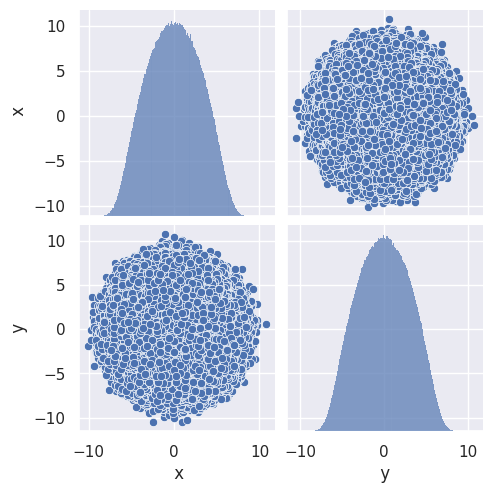

In [20]:
import seaborn as sns; sns.set()
A= Data
sns.pairplot(A)

Here we see the representation for only one even

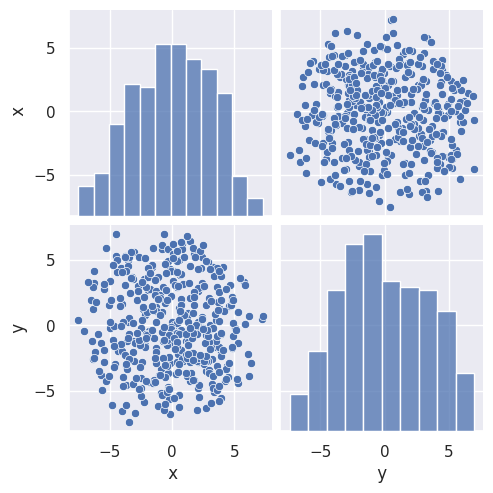

In [21]:
import seaborn as sns; sns.set()
A= Data.loc[Data['event']==str(1)]
sns.pairplot(A)

Here we see representation for all events for b=6

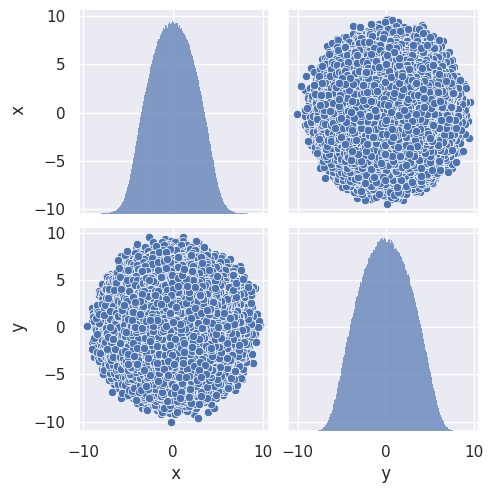

In [22]:
import seaborn as sns; sns.set()
A= Data6
sns.pairplot(A)

Here we see the representation for only one even

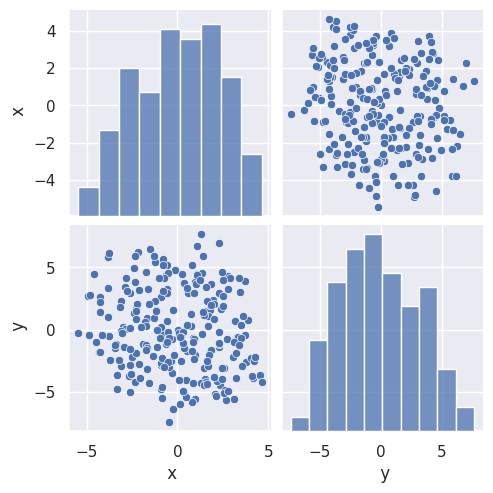

In [24]:
import seaborn as sns; sns.set()
A= Data6.loc[Data6['event']==str(1)]
sns.pairplot(A)

Here we calcaulte SKe for  b = 0

In [30]:

from scipy.stats import gaussian_kde


# Define the bandwidth based on the proton radius
bandwidth = 0.877

def calculate_kde_eccentricity(data, bandwidth):
    eccentricities = []
    for i in range (1000):
        A=np.array(Data.loc[Data['event']==str(10*i)],dtype=float)
        x = A[:, 1] - np.mean(A[:, 1])
        y = A[:, 2] - np.mean(A[:, 2])

        values = np.vstack([x, y])
        kernel = gaussian_kde(values, bw_method=bandwidth)

        grid_x = np.linspace(x.min(), x.max(), 100)
        grid_y = np.linspace(y.min(), y.max(), 100)
        grid_x, grid_y = np.meshgrid(grid_x, grid_y)
        positions = np.vstack([grid_x.ravel(), grid_y.ravel()])
        density = np.reshape(kernel(positions).T, grid_x.shape)
        #caclcautle r & phi
        r = np.sqrt(grid_x**2 + grid_y**2)
        phi = np.arctan2(grid_y, grid_x)

        # Calculate the eccentricity using the density from KDE
        density_weighted_r2 = density * r**2
        e2 = np.sqrt((np.sum(density_weighted_r2 * np.cos(2*phi)))**2 + (np.sum(density_weighted_r2 * np.sin(2*phi)))**2) / np.sum(density_weighted_r2)

        eccentricities.append(e2)
    return eccentricities

# e for b=0
eccentricities_kde_b0 = calculate_kde_eccentricity(Data, bandwidth)
print(f"mean, stdm skew for b=0 are:{np.mean(eccentricities_kde_b0), np.std(eccentricities_kde_b0), skew(eccentricities_kde_b0)}")


mean, stdm skew for b=0 are:(0.05632914265134306, 0.030733704406843768, 0.8483761805584676)


B = 6

In [31]:

from scipy.stats import gaussian_kde


# Define the bandwidth based on the proton radius
bandwidth = 0.877

def calculate_kde_eccentricity(data, bandwidth):
    eccentricities = []
    for i in range (1000):
        A=np.array(Data6.loc[Data6['event']==str(10*i)],dtype=float)
        x = A[:, 1] - np.mean(A[:, 1])
        y = A[:, 2] - np.mean(A[:, 2])

        values = np.vstack([x, y])
        kernel = gaussian_kde(values, bw_method=bandwidth)

        grid_x = np.linspace(x.min(), x.max(), 100)
        grid_y = np.linspace(y.min(), y.max(), 100)
        grid_x, grid_y = np.meshgrid(grid_x, grid_y)
        positions = np.vstack([grid_x.ravel(), grid_y.ravel()])
        density = np.reshape(kernel(positions).T, grid_x.shape)
        #caclcautle r & phi
        r = np.sqrt(grid_x**2 + grid_y**2)
        phi = np.arctan2(grid_y, grid_x)

        # Calculate the eccentricity using the density from KDE
        density_weighted_r2 = density * r**2
        e2 = np.sqrt((np.sum(density_weighted_r2 * np.cos(2*phi)))**2 + (np.sum(density_weighted_r2 * np.sin(2*phi)))**2) / np.sum(density_weighted_r2)

        eccentricities.append(e2)
    return eccentricities

# e for b=6
eccentricities_kde_b6 = calculate_kde_eccentricity(Data6, bandwidth)


print(f"mean, stdm skew for b=6 are:{np.mean(eccentricities_kde_b6), np.std(eccentricities_kde_b6), skew(eccentricities_kde_b6)}")


mean, stdm skew for b=6 are:(0.2014054372358966, 0.0898709364867023, 0.301323980177641)


 for the code I suggested, I picked a common smooth pattern called a "Gaussian kernel" to estimate how crowded the nucleons are in different parts of the collision. The bandwidth is like deciding how big of a magnifying glass to use; too big, and we might miss important details, but too small, and we'll see things that aren't really there. I chose the size of the magnifying glass based on how big we know nucleons (like protons and neutrons) are. After using Kernel Density Estimation, the average shape for the b=0 fm collisions appears less stretched compared to the original method, but the distribution has become more skewed. For the b=6 fm collisions, the average shape is less elongated than we first thought, and the skewness is reduced, indicating a more uniform distribution of shapes. This suggests that when we account for the actual size of the nucleons, the collisions look a bit more evened out, and the sensitivity to the bandwidth—how much our results change with the size of our 'nucleon magnifying glass'—is quite significant, particularly for b=0 fm.

### <span style="color:LightGreen">Question 08</span>

The effect of fluctuations means that higher order eccentricities can also

---

exist (first discussed in ref [[2]](https://arxiv.org/pdf/1003.0194.pdf)).  Calculate:

$$
\Large \varepsilon_3 = \frac{\sqrt{\langle r^2\cos(3\phi)\rangle^2 + \langle r^2\sin(3\phi)\rangle^2}}{\langle r^2 \rangle}
$$

for the same collisions.  In general $\varepsilon_n$ represents the magnitude of the $n\phi$ symmetry in the angular distribution.  How do the values of $\varepsilon_2$ and $\varepsilon_3$ values vary for the two impact parameters?  What about the width of the distributions?

In [26]:
# E3 for b=0
e3_b0 = np.empty(1000)
for i in range (1000):
  A=np.array(Data.loc[Data['event']==str(10*i)],dtype=float)
  A=A[:,1:3]
  x=A[:,0]-np.mean(A[:,0])
  y=A[:,1]-np.mean(A[:,1])
  r=x**2+y**2
  Phi=np.arctan(y/x)
  e3_b0[i]=(((np.sum(r**2*np.cos(3*Phi))))**2+(np.sum(r**2*np.sin(3*Phi)))**2)**0.5/(np.sum(r**2))

Text(0, 0.5, 'N')

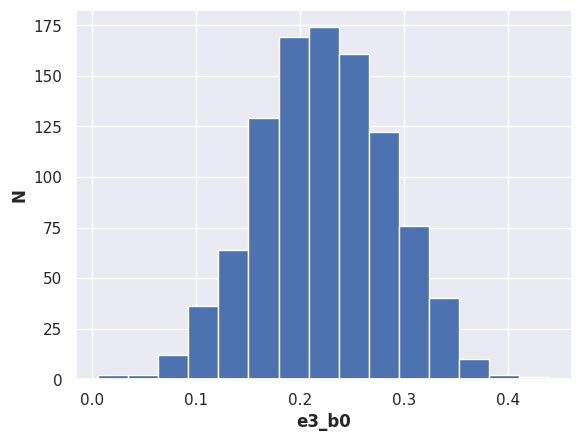

In [27]:
#histogram bor b-0
plt.hist(e3_b0,bins=15)
plt.xlabel('e3_b0',weight='bold')
plt.ylabel("N",weight='bold')


In [28]:
# E3 for b=6
e3_b6 = np.empty(1000)
for i in range (1000):
  A=np.array(Data6.loc[Data6['event']==str(10*i)],dtype=float)
  A=A[:,1:3]
  x=A[:,0]-np.mean(A[:,0])
  y=A[:,1]-np.mean(A[:,1])
  r=x**2+y**2
  Phi=np.arctan(y/x)
  e3_b6[i]=(((np.sum(r**2*np.cos(3*Phi))))**2+(np.sum(r**2*np.sin(3*Phi)))**2)**0.5/(np.sum(r**2))

Text(0, 0.5, 'N')

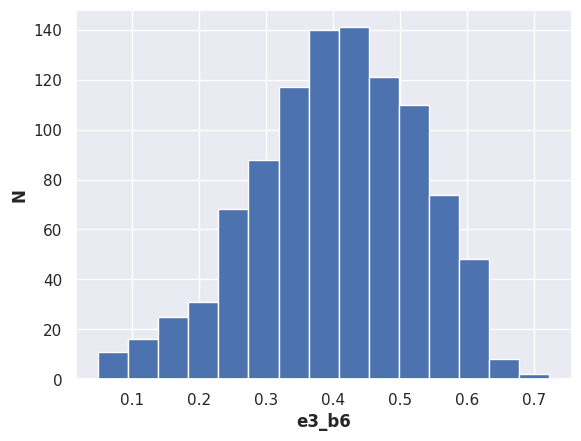

In [29]:
#histogram bor b-0
plt.hist(e3_b6,bins=15)
plt.xlabel('e3_b6',weight='bold')
plt.ylabel("N",weight='bold')


Above figure shows the higher order eccentricity for the data with b=0 and b=6. For b=6 the value (0.41) is clearly higher than the second order (0.3) eccentricity. Also, the width is slightly higher than the previous eccentricity, meaning that the distribution of eccentricity between different events is larger.This figure also shows the third order eccentricities for the case b=0. In this case also the third order value 0.22 is larger than the second order value (0.07). The width also is slightly larger than the second order value histogram.

## <span style="color:Orange">References</span>

__[<span style="color:Red">1</span>]__ C. Loizides, J. Kamin, D. d'Enterria, "Improved Monte Carlo Glauber predictions at present and future nuclear colliders", _Phys.Rev.C 97 (2018) 5, 054910, Phys.Rev.C 99 (2019) 1, 019901 (erratum)_, e-Print: [1710.07098]

__[<span style="color:Red">2</span>]__ B.Alver, G.Roland, "Collision geometry fluctuations and triangular flow in heavy-ion collisions", _Phys.Rev.C 81 (2010) 054905, Phys.Rev.C 82 (2010) 039903 (erratum)_, e-Print: [1003.0194]


<span style="color:Red">[3]</span> C. P. Singh, "Quark-Gluon Plasma: From Big Bang to Little Bang," Cambridge University Press, 2016.


<span style="color:Red">[4]</span> J. Schukraft, "Heavy ion collisions at the LHC," Nucl. Phys. A 967, 1-24, 2017.



<span style="color:Red">[5]</span> K. Adcox et al., "Formation of dense partonic matter in relativistic nucleus-nucleus collisions at RHIC: Experimental evaluation by the PHENIX Collaboration," Phys. Rev. Lett. 88, 022301, 2005.


<span style="color:Red">[6]</span> I. Arsene et al., "Quark gluon plasma and color glass condensate at RHIC? The perspective from the BRAHMS experiment," Nucl. Phys. A 757, 1-27, 2005.


## <span style="color:Orange">Acknowledgements</span>

* Initial version: Anne Sickles

© Copyright 2024